<a href="https://colab.research.google.com/github/udayfulkatwar/Green-AI-Workshop/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
pip install tensorflow

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [7]:
df = pd.read_csv("agricultural_yield.csv")
df.head()

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,93.304721,0,132.522218,96.670922,602.386237,3,278.986563
1,83.674653,1,57.283997,99.007556,466.518251,8,836.434840
2,65.963033,1,227.895479,104.844272,510.320495,4,785.881787
3,78.692834,1,176.314126,90.136191,354.350914,5,807.884526
4,72.415684,1,160.070418,101.221668,443.993788,10,1064.542374


In [8]:
x = df[['Soil_Quality', 'Seed_Variety', 'Fertilizer_Amount_kg_per_hectare', 'Sunny_Days','Rainfall_mm', 'Irrigation_Schedule']].values
y= df['Yield_kg_per_hectare'].values

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size=0.2,random_state=42)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [11]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

In [13]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 532103.5000 - mae: 701.0410 - val_loss: 540360.8750 - val_mae: 708.1929
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 498438.7500 - mae: 676.8563 - val_loss: 406237.6875 - val_mae: 611.5369
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 327573.3125 - mae: 544.4429 - val_loss: 159790.2188 - val_mae: 379.8251
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 102240.6406 - mae: 294.5883 - val_loss: 21223.7109 - val_mae: 124.7829
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 15335.4199 - mae: 101.0518 - val_loss: 9479.3857 - val_mae: 77.8839
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9461.4717 - mae: 77.0726 - val_loss: 8700.4824 - val_mae: 74.2154
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9572.0254 - mae: 77.9256 - val_loss: 8178.9858 - val_mae: 71.8891
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8421.5498 - mae: 73.5586 - val_loss: 7701.5850 -

In [14]:
test_loss, test_mae = model.evaluate(x_test, y_test, verbose=1)
print(f'Test Mean Absolute Error: {test_mae:.2f}')

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2824.7544 - mae: 43.1912 
Test Mean Absolute Error: 41.13


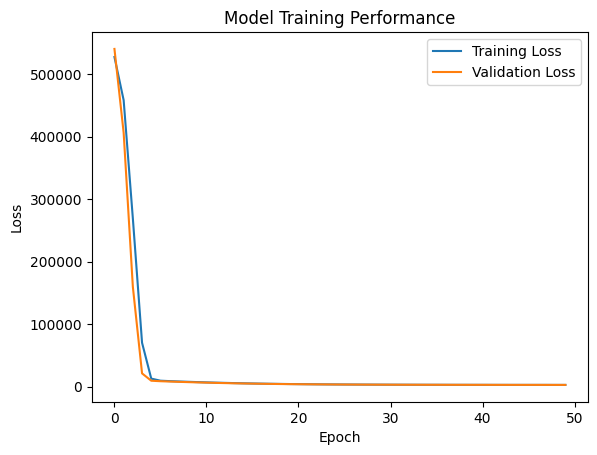

In [15]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,173 (59.27 KB)

 Trainable params: 5,057 (19.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,116 (39.52 KB)

In [17]:
y_pred = model.predict(x_test)
y_pred

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[ 454.41678],
       [ 669.70325],
       [1093.3325 ],
       [ 676.0979 ],
       [ 817.6758 ],
       [1003.80365],
       [ 321.47342],
       [ 581.58575],
       [ 445.96945],
       [ 797.0668 ],
       [ 615.10815],
       [ 676.17993],
       [ 639.7186 ],
       [ 738.4967 ],
       [ 852.926  ],
       [ 685.8711 ],
       [ 967.3956 ],
       [ 477.04828],
       [ 581.4828 ],
       [ 372.53174],
       [ 792.06396],
       [ 812.59894],
       [ 376.9926 ],
       [ 828.5206 ],
       [1023.9722 ],
       [ 590.62524],
       [ 658.3668 ],
       [ 977.5528 ],
       [ 623.1546 ],
       [ 638.10767],
       [ 684.36523],
       [ 805.62274],
       [ 834.50665],
       [ 804.2213 ],
       [ 521.09564],
       [ 721.8903 ],
       [ 712.64636],
       [1028.1619 ],
       [ 247.17522],
       [ 652.7013 ],
       [ 937.845  ],
       [ 893.8997 ],
       [ 782.7954 ],
       [ 773.92566],
       [ 625.6653 ],
       [ 845.4646 ],
       [ 634.3175 ],
       [ 586.

In [18]:
test_loss, test_mae = model.evaluate(x_test, y_test, verbose=1)
print(f'Test Mean Absolute Error: {test_mae:.2f}')

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2824.7544 - mae: 43.1912 
Test Mean Absolute Error: 41.13


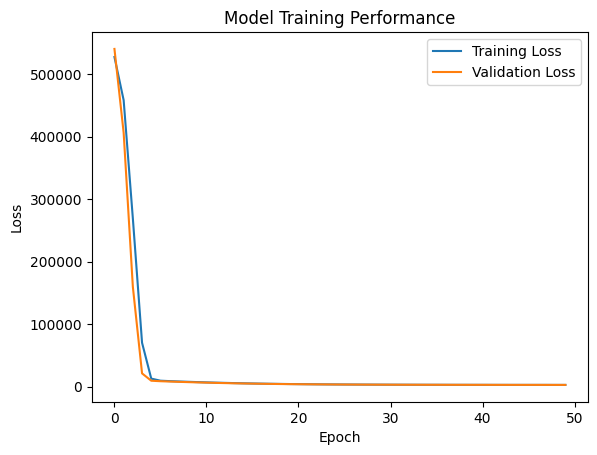

In [19]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

<ipython-input-26-ff19ce075706>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label='Actual Yield')
<ipython-input-26-ff19ce075706>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='Predicted Yield')


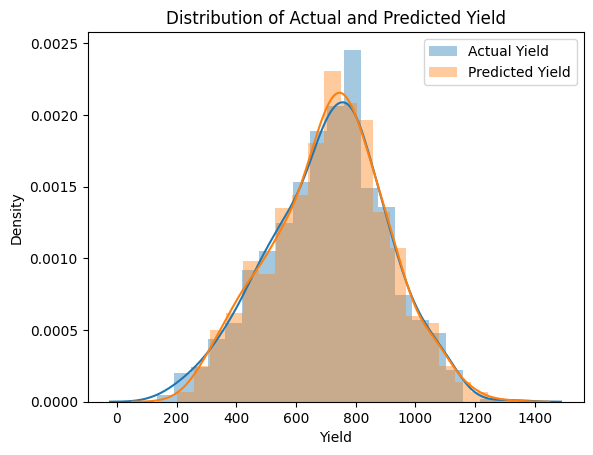

In [26]:
sns.distplot(y_test, label='Actual Yield')
sns.distplot(y_pred, label='Predicted Yield')
plt.xlabel("Yield")
plt.ylabel("Density")
plt.title("Distribution of Actual and Predicted Yield")
plt.legend()
plt.show()

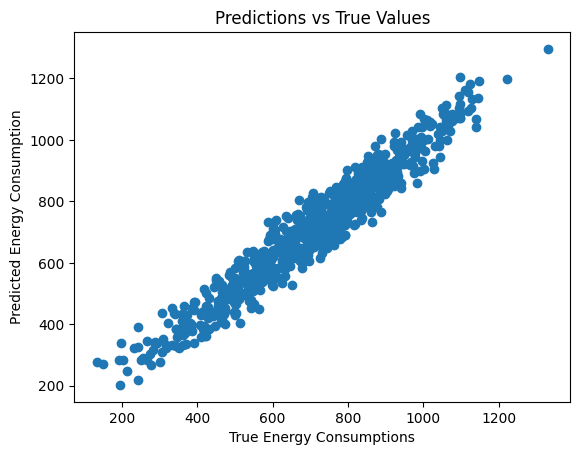

In [28]:
plt.scatter(y_test, y_pred)
plt.xlabel("True Energy Consumptions")
plt.ylabel("Predicted Energy Consumption")
plt.title("Predictions vs True Values")
plt.show()